## Libraries

In [1]:
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt

## Function to remove emojies and short forms

In [2]:
def clean_text(text):
    text = text.lower()
    emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    text = emoji.sub(r'', text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text

## Helper function to make dictionary

In [3]:
def make_dict(conv):
    cleaned_conv = ""
    for q in conv:
        q = clean_text(q)
        if q != "":
            cleaned_conv = cleaned_conv + q + ' '
            
    cleaned_conv = cleaned_conv.split(" ")  
    cleaned_conv_final = []
    for i in cleaned_conv:
        if i!='': cleaned_conv_final.append(i)
    
    return Counter(cleaned_conv_final) 

## Function for formatting the text and creating dictionary

In [4]:
def chat_to_dict(friend, my_name):
    conversations = open(friend+'.txt', encoding = 'utf-8', errors = 'ignore').read().split('\n')    

    conv_all = []
    for conv in conversations[:-1]:
        _conv = conv.split(' - ')
        conv_all.append(_conv[1:])
    
    conv_me = []
    conv_friend = [] 
    conv_both = []
    for conv in conv_all[0:3000]:
        _conv = str(conv).replace("['","").replace("']","")
        _conv = _conv.split(': ')
        conv_both.append(str(_conv[1:2]).replace("['","").replace("']","").replace("..."," "))
        if _conv[0] == my_name:
            conv_me.append(str(_conv[1:2]).replace("['","").replace("']","").replace("..."," "))
        else:
            conv_friend.append(str(_conv[1:2]).replace("['","").replace("']","").replace("..."," "))
            
    me = make_dict(conv_me)
    both = make_dict(conv_both)
    fr = make_dict(conv_friend)
    
    return me, fr, both

## Calculating word entropy using Shannon equation
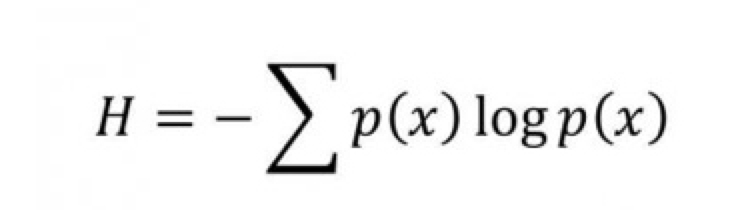 

In [5]:
def entropy(dic):
    total = sum(dic.values())
    return sum(freq / total * np.log2(total / freq) for freq in dic.values())

## Passing the file names and your username

In [7]:
me, fr, both = [], [], []
friends = ['patrali', 'sayanti', 'sudeshna'] # add file names (without .txt)
for f in friends:
    a,b,c = chat_to_dict(f, my_name='orion') # add your whatsapp username
    me.append(entropy(a))
    fr.append(entropy(b))
    both.append(entropy(c))

## Visualize the entropies with a bar chart

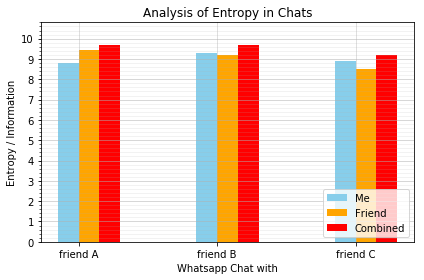

In [8]:
n_groups = 3
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
error_config = {'ecolor': '0.2'}
rects1 = ax.bar(index, me, bar_width,
                color='skyblue',
                error_kw=error_config,
                label='Me')
rects2 = ax.bar(index + bar_width, fr, bar_width,
                color='orange',
                error_kw=error_config,
                label='Friend')

rects3 = ax.bar(index + 2*bar_width, both, bar_width,
                color='red',
                error_kw=error_config,
                label='Combined')

ax.set_xlabel('Whatsapp Chat with')
ax.set_ylabel('Entropy / Information')
ax.set_title('Analysis of Entropy in Chats')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('friend A', 'friend B', 'friend C'))
ax.legend(loc=4)
major_ticks = np.arange(0, 11, 1)
minor_ticks = np.arange(0, 11, .2)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
fig.tight_layout()
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
plt.show()

## Interpretation
From this analysis I found that 'combined' chat entropies with A and B are nearly same but with C its low. Which implies that chat with C contains the least amount information.

For friend A, the entropy(information) difference between A's chat and my chat is large comapred to other two cases.

For friend B, my chat entropy is the largest compared to other two cases.

